In [4]:
import pandas as pd

netflix = pd.read_csv('../Desktop/netflix_titles.csv')

In [37]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

## 1. 데이터 전처리

In [38]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'num_of_cast'],
      dtype='object')

### 주연배우 몇 명인지 구하기

In [26]:
def cast_counter(cast):
    if cast == 'Unknown':
        return 0
    else:
        tmp = cast.split(',')
        return len(tmp)

In [27]:
netflix['num_of_cast'] = netflix['cast'].apply(cast_counter)

In [28]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_of_cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",19
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9
3,s4,TV Show,Jailbirds New Orleans,NaN,Unknown,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,8


### Ratings

In [30]:
netflix.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [32]:
for i in netflix.index:
    if netflix.loc[i, 'rating'] == 'UR':
        netflix.loc[i,'rating'] = 'NR'

In [42]:
netflix.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV'], dtype=object)

In [47]:
netflix[netflix['rating'] == '84 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_of_cast
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,1


In [48]:
netflix[netflix['rating'] == '74 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_of_cast
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",1


In [49]:
netflix[netflix['rating'] == '66 min']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,num_of_cast
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,1


### 날짜

In [39]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

## 2. 데이터 시각화

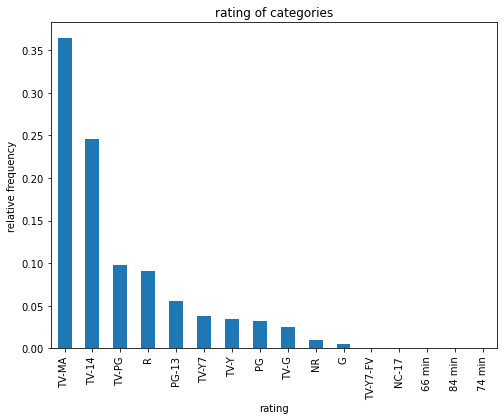

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
netflix['rating'].value_counts(normalize = True).plot.bar()
plt.title('rating of categories')
plt.xlabel('rating')
plt.ylabel('relative frequency')
plt.show()

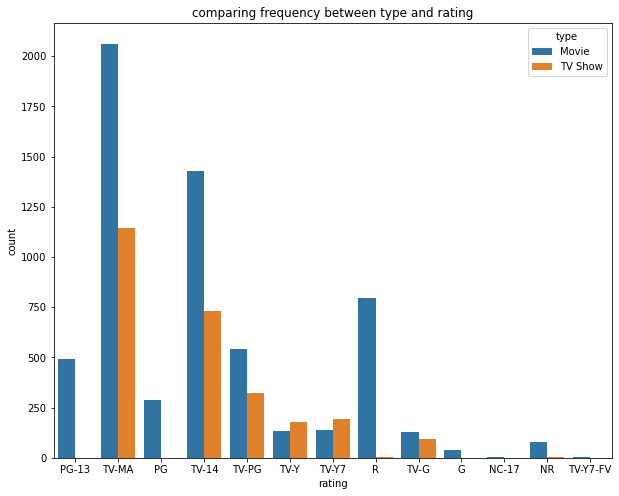

In [54]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=netflix)
plt.title('comparing frequency between type and rating')
plt.show()

### 나라별 영화, 드라마 비율

In [55]:
netflix['country'].value_counts().sort_values(ascending = False)

United States                                             2818
India                                                      972
United Kingdom                                             419
Japan                                                      245
South Korea                                                199
                                                          ... 
Canada, Germany, France, United States                       1
United States, Taiwan                                        1
France, Israel, Germany, United States, United Kingdom       1
United Kingdom, Kenya                                        1
Slovenia, Croatia, Germany, Czech Republic, Qatar            1
Name: country, Length: 748, dtype: int64

In [56]:
top_productive_countries = netflix[(netflix['country']=='United States') |
                                  (netflix['country']=='India')|
                                  (netflix['country']=='United Kingdom')|
                                  (netflix['country']=='Japan')|
                                  (netflix['country']=='South Korea')]

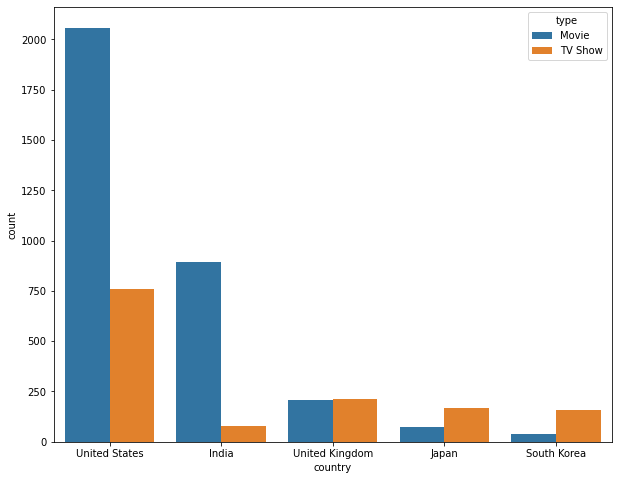

In [59]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'country', hue = 'type', data = top_productive_countries)
plt.show()

In [ ]:
ㄴ